In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pdb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
imdb_data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print("shape -> ", imdb_data.shape)
imdb_data.head()

shape ->  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
train_reviews = imdb_data.review[:40000]
test_reviews = imdb_data.review[:40000]

train_sentiments = imdb_data.sentiment[40000:]
test_sentiments = imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (10000,)
(40000,) (10000,)


In [6]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

tokenizer =  ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
from bs4 import BeautifulSoup
import re

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_square_brackets(text)
    return text

imdb_data['review'] = imdb_data['review'].apply(denoise_text)
imdb_data.head()

<ipython-input-7-64e17961242f>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
def remove_special_charachters(text, remove_digits = True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

imdb_data['review'] = imdb_data['review'].apply(remove_special_charachters)
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [9]:
from nltk.stem.porter import PorterStemmer

def simple_stemmer(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)
imdb_data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl product the film techniqu is ve...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [10]:
stop = set(stopwords.words('english'))
print(stop)

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)
imdb_data.head()

{"didn't", 'herself', 'aren', 'on', 'wouldn', 'had', 'd', "don't", 'for', 'doing', 'yours', 'only', 'himself', 'or', 'was', 'am', "she's", 'is', 'before', 'other', 'being', 'more', 't', 'and', 'their', 're', 'into', 'whom', 've', 'too', 'where', 'ma', "shouldn't", 'but', 'hadn', 'they', 'with', 'the', 'above', "that'll", 'ain', 'off', "won't", 'who', 'such', "mightn't", 'll', 'these', 'an', 'in', 'when', 'not', 'most', 'now', 'which', 'below', 'both', "weren't", 'that', "you'd", 'don', 'should', 'couldn', "wasn't", 'did', 'during', 'while', 'my', "wouldn't", 'again', "you'll", 'can', "hasn't", 'hers', 'his', "needn't", 'same', "haven't", 'were', 'any', 'a', 'about', 'we', 'if', 'you', 'isn', 'because', "hadn't", 'under', "doesn't", 'shouldn', 'further', 'weren', 'do', 'by', 'to', 'no', 'didn', 'having', 'until', 'up', "couldn't", 'it', "it's", 'doesn', 'few', 'she', 'them', 'its', 'at', 'itself', 'theirs', 'from', 'ourselves', 'him', 'nor', 'will', 'wasn', 'yourself', 'over', 'all', 'w

,review,sentiment
0,one review ha mention watch 1 Oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


In [11]:
from textblob import TextBlob
# from autocorrect import Speller

norm_train_reviews=imdb_data.review[:40000]
print(norm_train_reviews[0])
# norm_train_string = norm_train_reviews.to_string()
# norm_train_spelling = Speller().spell(norm_train_string)
# # norm_train_spelling.correct()

# norm_train_words = norm_train_spelling.words
# norm_train_words
# print("-------------------------")
# print(norm_train_spelling)
# print("-------------------------")
# print(norm_train_words)

one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison expe

In [12]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0,max_df=1, binary=False, ngram_range=(1,3))

cv_train_reviews = cv.fit_transform(norm_train_reviews)

cv_test_reviews = cv.transform(norm_test_reviews)
print('Cv_train:',cv_train_reviews.shape)
print('Cv_test:',cv_test_reviews.shape)
print('Features: ',cv.get_feature_names_out().shape)

Cv_train: (40000, 6208633)
Cv_test: (10000, 6208633)
Features:  (6208633,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tv_train_reviews=tv.fit_transform(norm_train_reviews)

tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6208633)
Tfidf_test: (10000, 6208633)


In [15]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

sentiment_data = lb.fit_transform(imdb_data['sentiment'])
sentiment_data.shape

(50000, 1)

In [16]:
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [17]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

lr_cv = lr.fit(cv_train_reviews,train_sentiments)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
lr_cv_predict=lr.predict(cv_test_reviews)
print(lr_cv_predict)

lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [19]:
from sklearn.metrics import accuracy_score

lr_cv_score=accuracy_score(test_sentiments,lr_cv_predict)
print("lr_cv_score :",lr_cv_score)

lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_cv_score : 0.7514
lr_tfidf_score : 0.7498


In [20]:
from sklearn.metrics import classification_report

lr_cv_report=classification_report(test_sentiments,lr_cv_predict,target_names=['Positive','Negative'])
print(lr_cv_report)


lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [21]:
from sklearn.metrics import confusion_matrix

cm_cv=confusion_matrix(test_sentiments,lr_cv_predict,labels=[1,0])
print(cm_cv)

cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3770 1237]
 [1249 3744]]
[[3662 1345]
 [1157 3836]]


In [22]:
from sklearn.linear_model import SGDClassifier

svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

svm_cv=svm.fit(cv_train_reviews,train_sentiments)
print(svm_cv)

svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [23]:
svm_cv_predict=svm.predict(cv_test_reviews)
print(svm_cv_predict)

svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [24]:
svm_cv_score=accuracy_score(test_sentiments,svm_cv_predict)
print("svm_cv_score :",svm_cv_score)

svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_cv_score : 0.583
svm_tfidf_score : 0.5112


In [25]:
svm_cv_report=classification_report(test_sentiments,svm_cv_predict,target_names=['Positive','Negative'])
print(svm_cv_report)

svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [26]:
cm_cv=confusion_matrix(test_sentiments,svm_cv_predict,labels=[1,0])
print(cm_cv)

cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4947   60]
 [4110  883]]
[[5007    0]
 [4888  105]]


<function matplotlib.pyplot.show(close=None, block=None)>

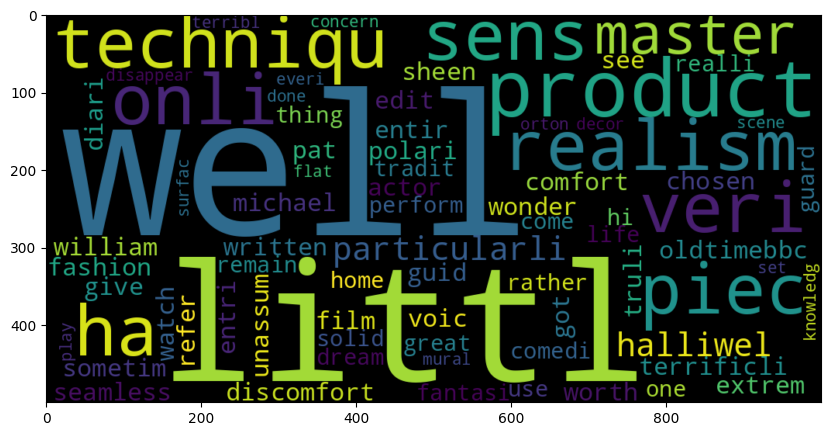

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

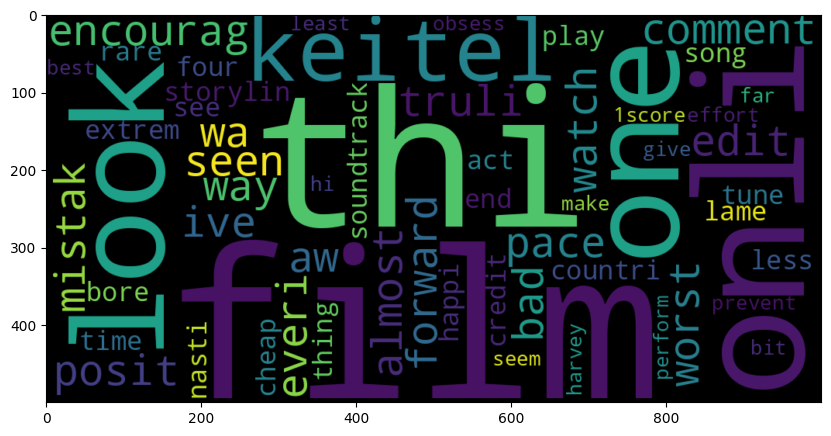

In [28]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show